In [1]:
import pandas as pd
import seaborn as sns
import os
import re 
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing,svm

In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\EmEm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# import nltk
# nltk.download('stopwords')

In [4]:
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
cv = CountVectorizer()
tfidf_Vect = TfidfVectorizer()
pd.set_option('display.max_colwidth',100)
stopwords = nltk.corpus.stopwords.words('english')
data0 = pd.read_csv("SPAM text message 20170820 - Data.csv")
data0.columns = ['spam0' , 'msg0']
dummy = pd.get_dummies(data0['spam0'])
data0 = pd.concat((data0 , dummy) , axis=1)
data = data0.drop(['ham'] , axis=1)
data = data.drop(['spam0'] , axis=1)
data.head()

,msg0,spam
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives around here though",0


In [5]:
data.shape

(5572, 2)

In [6]:
data.drop_duplicates(inplace = True)
data.shape

(5157, 2)

In [7]:
data.isnull().sum()

msg0    0
spam    0
dtype: int64

In [8]:
def clean_text(text):
    
    # remove punctuation
    text = "".join({c for c in text if c not in string.punctuation})
    
    # tokenization
    tokens = re.split('\W+',text)
    
    # remove stopwords & Stemming
    text = {ps.stem(word) for word in tokens if word not in stopwords}
    
    return text 

def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [9]:
data['msg'] = data['msg0'].apply(lambda x: utils_preprocess_text(x, flg_stemm=True, flg_lemm=True,lst_stopwords=stopwords))
data = data.drop(['msg0'] , axis=1)


In [10]:
# data['msg'] = data['msg0'].apply(lambda x: clean_text(x.lower()))
# data = data.drop(['msg0'] , axis=1)
# data.head()

In [11]:
data['msg']

0                              go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1                                                                                     ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
3                                                                       u dun say earli hor u c alreadi say
4                                                                 nah dont think goe usf live around though
                                                       ...                                                 
5567    2nd time tri 2 contact u u 750 pound prize 2 claim easi call 087187272008 now1 10p per minut btn...
5568                                                                                ü b go esplanad fr home
5569                                                                                piti mood soani suggest
5570                        

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd 
tfidf = TfidfVectorizer(min_df = 2, max_df = 0.5, ngram_range = (1, 2))
features = tfidf.fit_transform(data['msg'])  
pd.DataFrame(features.todense(),columns = tfidf.get_feature_names())
featuresDTF = pd.DataFrame(features)
print(features)
print(data['msg'])

C:\Users\EmEm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


  (0, 6759)	0.22314216161713452
  (0, 2747)	0.18789393935031398
  (0, 1387)	0.3385143166393943
  (0, 1096)	0.38296884206249465
  (0, 3532)	0.3385143166393943
  (0, 6987)	0.2833831338125328
  (0, 2802)	0.22542019931352036
  (0, 1097)	0.3385143166393943
  (0, 801)	0.31002362924842713
  (0, 1630)	0.31002362924842713
  (0, 4869)	0.27428805380171384
  (0, 2618)	0.16086944064375105
  (1, 4553)	0.48933072033908
  (1, 4603)	0.48933072033908
  (1, 6879)	0.38538554904536293
  (1, 3410)	0.4216151644860423
  (1, 3551)	0.3643210264421907
  (1, 4540)	0.24919814128398826
  (2, 1652)	0.26188979680437247
  (2, 6938)	0.2529733770804162
  (2, 2391)	0.21644213768981543
  (2, 710)	0.1915742067405654
  (2, 6409)	0.1430010800568736
  (2, 5115)	0.1831968267851581
  (2, 456)	0.26188979680437247
  :	:
  (5152, 4722)	0.16645179902934273
  (5153, 2122)	0.6619591122174304
  (5153, 2370)	0.5761073127545026
  (5153, 3048)	0.3772558158308759
  (5153, 2618)	0.29595362367248923
  (5154, 4215)	0.7071067811865475
  (5154

In [13]:
data.head()

,spam,msg
0,0,go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
3,0,u dun say earli hor u c alreadi say
4,0,nah dont think goe usf live around though


In [14]:
# from sklearn.feature_extraction.text import CountVectorizer
# message_bow = CountVectorizer(analyzer=clean_text).fit_transform(data['msg'])
# print(message_bow)

In [15]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(message_bow, data['spam'], test_size=0.25, random_state=1)

In [16]:
# message_bow.shape

In [17]:
# from collections import Counter
# print(sorted(Counter(y_train).items()))
# sns.countplot(y_train)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, data['spam'], test_size=0.25, random_state=1)

[(0, 3394), (1, 473)]


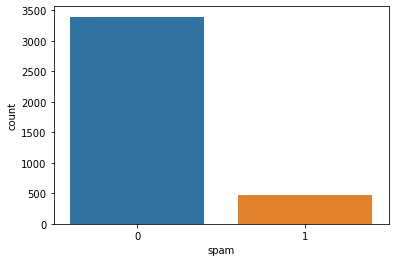

In [19]:
from collections import Counter
print(sorted(Counter(y_train).items()))
sns.countplot(y_train)

In [20]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1,sampling_strategy=0.5)
X_train, Y_train = rus.fit_resample(x_train, y_train)

[(0, 946), (1, 473)]


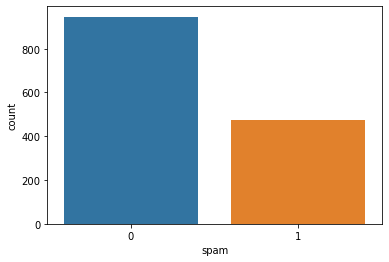

In [21]:
print(sorted(Counter(Y_train).items()))
sns.countplot(Y_train)

In [22]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_train, Y_train = ros.fit_resample(X_train, Y_train)

[(0, 946), (1, 946)]


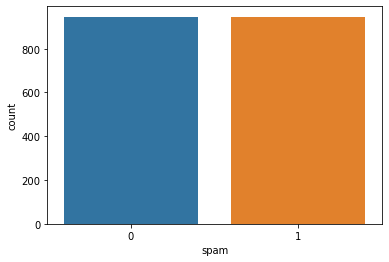

In [23]:
print(sorted(Counter(Y_train).items()))
sns.countplot(Y_train)

# Naive Bayes Classifier

In [24]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
naiveClassifier = MultinomialNB().fit(x_train, y_train)

print(naiveClassifier.predict(x_train))
print(y_train.values)


[0 1 0 ... 0 0 0]
[0 1 0 ... 0 0 0]


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_naivePred = naiveClassifier.predict(x_train)
print(classification_report(y_train, y_naivePred))
print('confusion_matrix: \n', confusion_matrix(y_train, y_naivePred))
print('accuracy_tain: \n', accuracy_score(y_train, y_naivePred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3394
           1       1.00      0.79      0.89       473

    accuracy                           0.97      3867
   macro avg       0.99      0.90      0.94      3867
weighted avg       0.98      0.97      0.97      3867

confusion_matrix: 
 [[3394    0]
 [  97  376]]
accuracy_tain: 
 0.9749159555210758


In [26]:
print(naiveClassifier.predict(x_test))
print(y_test.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_naivePred = naiveClassifier.predict(x_test)
print(classification_report(y_test, y_naivePred))
print('confusion_matrix: \n', confusion_matrix(y_test, y_naivePred))
print('accuracy_test: \n', accuracy_score(y_test, y_naivePred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1122
           1       0.99      0.73      0.84       168

    accuracy                           0.96      1290
   macro avg       0.98      0.87      0.91      1290
weighted avg       0.97      0.96      0.96      1290

confusion_matrix: 
 [[1121    1]
 [  45  123]]
accuracy_test: 
 0.9643410852713178


# Support Victor Machine Classifier

In [28]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(x_train , y_train)

print(SVM.predict(x_train))
print(y_train.values)
# predictions_SVM = SVM.predict(x_test)

[0 1 0 ... 0 0 0]
[0 1 0 ... 0 0 0]


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
SVM_y_pred = SVM.predict(x_train)
print(classification_report(y_train, SVM_y_pred))
print('confusion_matrix: \n', confusion_matrix(y_train, SVM_y_pred))
print('accuracy_tain: \n', accuracy_score(y_train, SVM_y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3394
           1       1.00      0.96      0.98       473

    accuracy                           0.99      3867
   macro avg       1.00      0.98      0.99      3867
weighted avg       0.99      0.99      0.99      3867

confusion_matrix: 
 [[3393    1]
 [  20  453]]
accuracy_tain: 
 0.9945694336695112


In [30]:
print(SVM.predict(x_test))
print(y_test.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = SVM.predict(x_test)
print(classification_report(y_test, pred))
print('confusion_matrix: \n', confusion_matrix(y_test, pred))
print('accuracy_test: \n', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1122
           1       0.99      0.83      0.90       168

    accuracy                           0.98      1290
   macro avg       0.98      0.92      0.95      1290
weighted avg       0.98      0.98      0.98      1290

confusion_matrix: 
 [[1120    2]
 [  28  140]]
accuracy_test: 
 0.9767441860465116


In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_pred_train = logistic_clf.predict(X_train)
print(X_train.shape)
print(accuracy_score(Y_train, y_pred_train))
print(Y_train)
print(y_pred_train)

(1892, 7160)
0.846723044397463
0       0
1       0
2       0
3       0
4       0
       ..
1887    1
1888    1
1889    1
1890    1
1891    1
Name: spam, Length: 1892, dtype: uint8
[0 0 0 ... 1 1 1]


In [34]:
pred = logistic_clf.predict(X_train)
print(classification_report(Y_train, pred))
print('confusion_matrix: \n', confusion_matrix(Y_train, pred))
print('accuracy_tain: \n', accuracy_score(Y_train, pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       946
           1       1.00      0.70      0.82       946

    accuracy                           0.85      1892
   macro avg       0.88      0.85      0.84      1892
weighted avg       0.88      0.85      0.84      1892

confusion_matrix: 
 [[944   2]
 [288 658]]
accuracy_tain: 
 0.846723044397463


In [35]:
print(logistic_clf.predict(x_test))
print(y_test.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [36]:
pred = logistic_clf.predict(x_test)
print(classification_report(y_test, pred))
print('confusion_matrix: \n', confusion_matrix(y_test, pred))
print('accuracy_test: \n', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1122
           1       0.96      0.57      0.71       168

    accuracy                           0.94      1290
   macro avg       0.95      0.78      0.84      1290
weighted avg       0.94      0.94      0.93      1290

confusion_matrix: 
 [[1118    4]
 [  73   95]]
accuracy_test: 
 0.9403100775193799


In [37]:
# pip install tensorflow

In [38]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense

In [39]:
# model = Sequential()
# model.add(Conv2D(16, 5, activation = 'relu', input_shape=(IMG_DIMEN, IMG_DIMEN, N_COLORS)))
# model.add(Conv2D(16, 5, activation = 'relu'))
# model.add(MaxPooling2D(2))
# model.add(Conv2D(32, 3, activation = 'relu'))
# model.add(Conv2D(32, 3, activation = 'relu'))
# model.add(MaxPooling2D(2))
# model.add(Conv2D(64, 1, activation = 'relu'))
# model.add(Conv2D(64, 1, activation = 'relu'))
# model.add(MaxPooling2D(2))
# model.add(GlobalAveragePooling2D())
# model.add(Dense(128, activation = 'relu'))
# model.add(Dense(64, activation = 'relu'))
# model.add(Dense(32, activation = 'relu'))
# model.add(Dense(16, activation = 'relu'))
# model.add(Dense(1, activation = 'relu'))
# model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [40]:
# from tensorflow.keras.callbacks import ModelCheckpoint

# checkpoint = ModelCheckpoint(
#     'saved-model/best-model', monitor = 'val_loss', mode = 'min',
#     save_weights_only = True, save_best_only = True, verbose = 1
# )
# history = model.fit(
#     X_train, y_train,
#     validation_data = (X_val, y_val),
#     batch_size = 32,
#     epochs = 120,
#     callbacks = [checkpoint]
# )

In [42]:
# model.load_weights('saved-model/best-model')
# test_loss, test_acc=model.evaluate(X_test, y_test)

In [43]:
model_best= naiveClassifier
model_best.fit(x_train, y_train)

MultinomialNB()

In [44]:
y_pred_test= model_best.predict(x_test)

In [45]:
accuracy_score(y_test, y_pred_test)

0.9643410852713178

In [46]:
import pickle

with open('saved-model.pickle', 'wb') as f:
    pickle.dump(model_best,f)


NameError: name 'scaler' is not defined